In [6]:
%matplotlib inline
# Simulating the Ising model
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N, temp     = 64, .4        # Initialse the lattice
        config = 2*np.random.randint(2, size=(N,N))-1
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 1001
        for i in range(msrmnt):
            self.mcmove(config, N, 1.0/temp)
            if i == 1:        self.configPlot(f, config, i, N, 2);
            if i == 4:       self.configPlot(f, config, i, N, 3);
            if i == 32:      self.configPlot(f, config, i, N, 4);
            if i == 100:     self.configPlot(f, config, i, N, 5);
            if i == 1000:    self.configPlot(f, config, i, N, 6);
            #self.configPlot(f,config, i, N, 1)
                 
                    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
        plt.show()
    

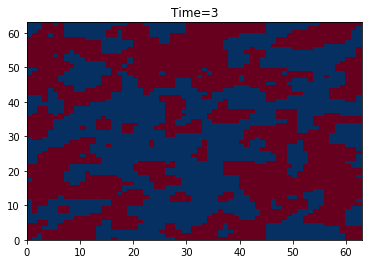

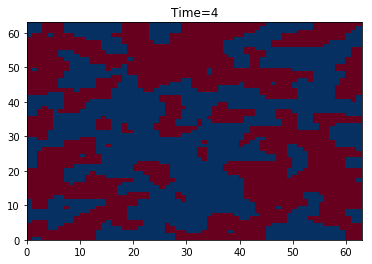

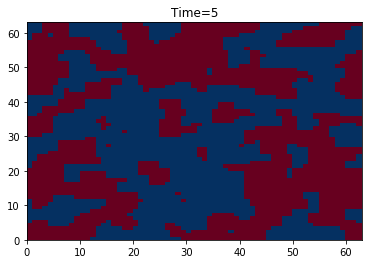

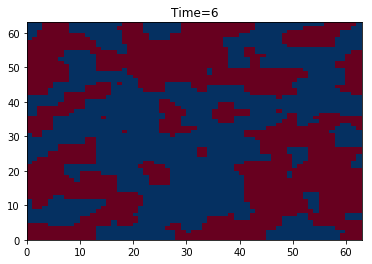

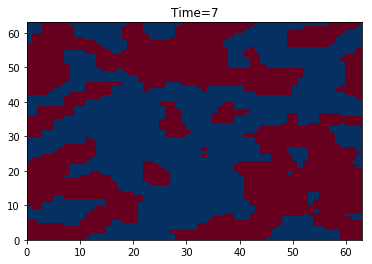

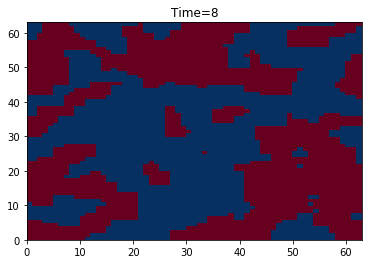

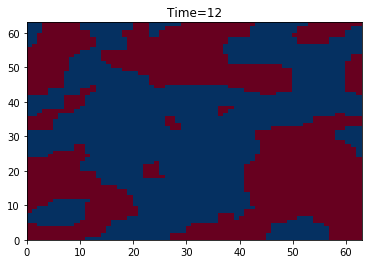

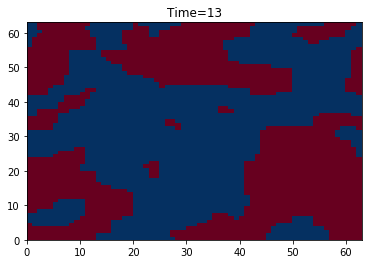

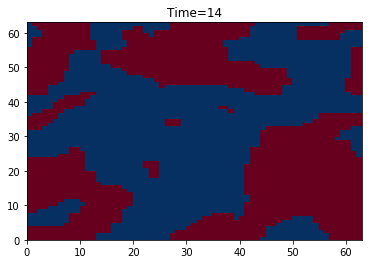

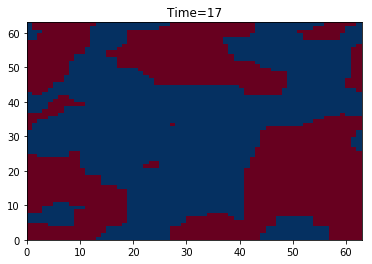

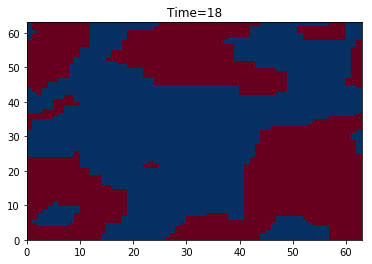

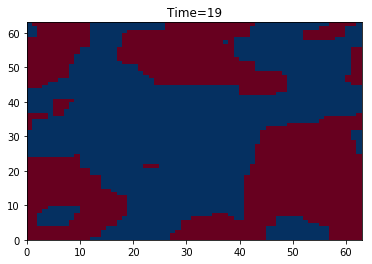

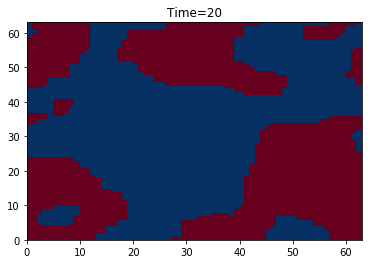

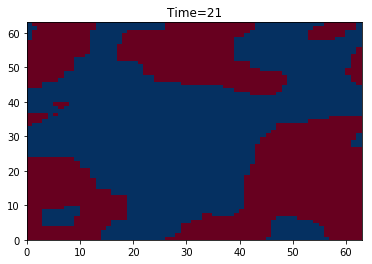

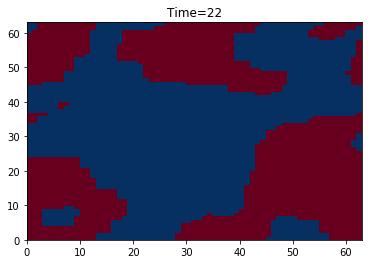

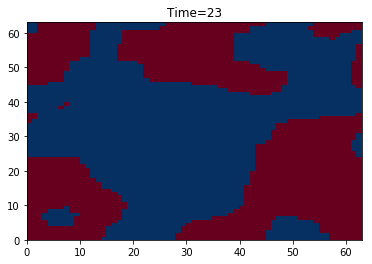

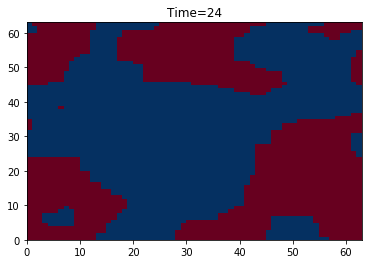

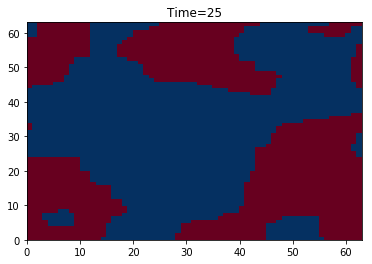

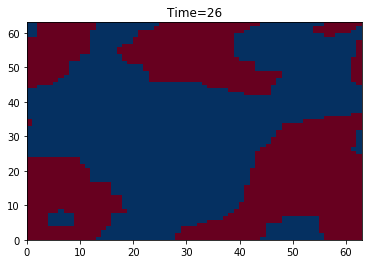

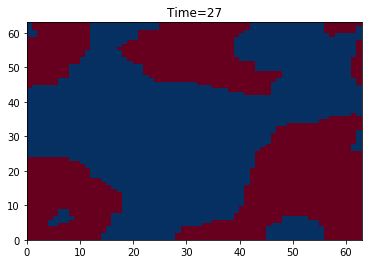

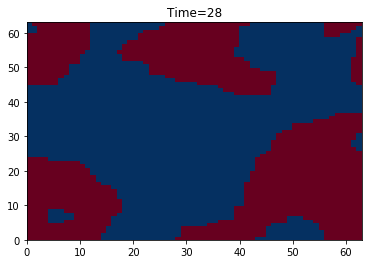

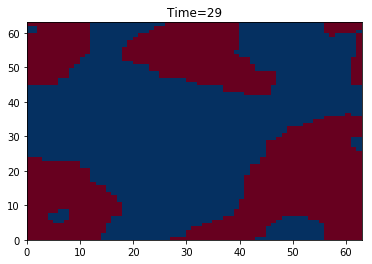

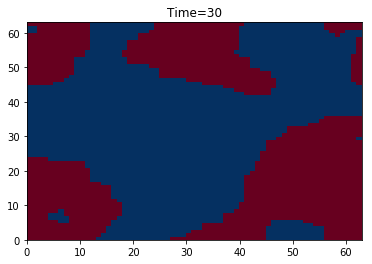

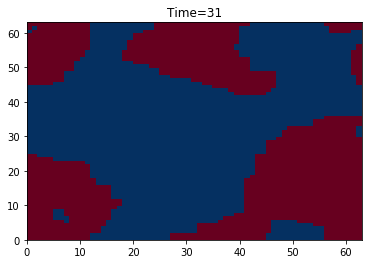

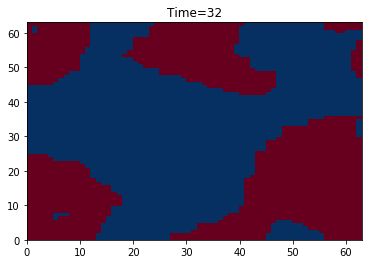

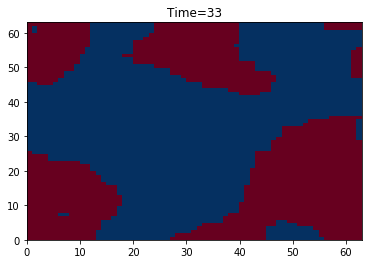

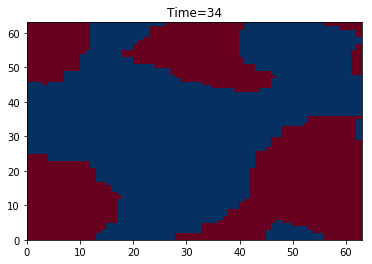

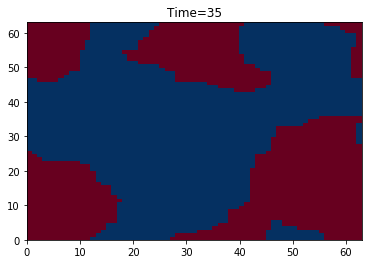

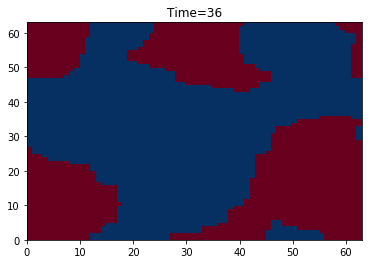

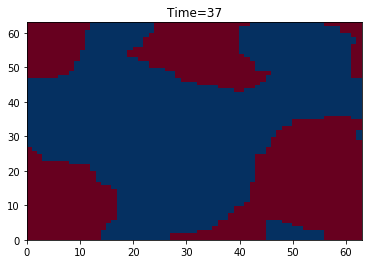

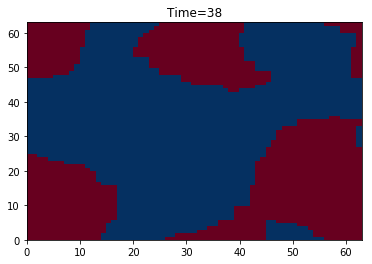

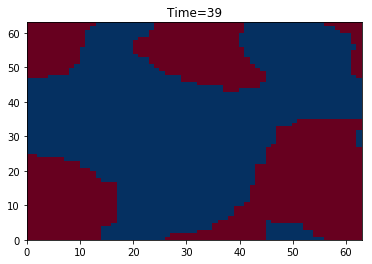

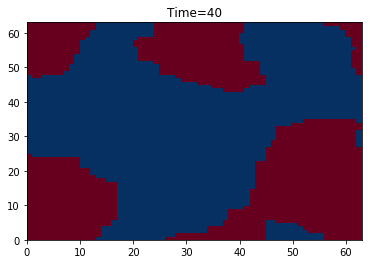

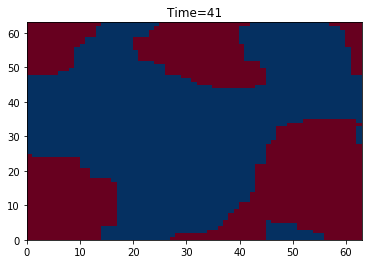

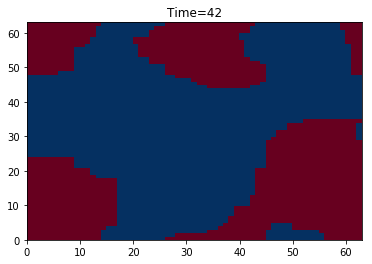

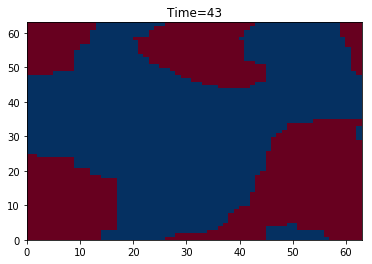

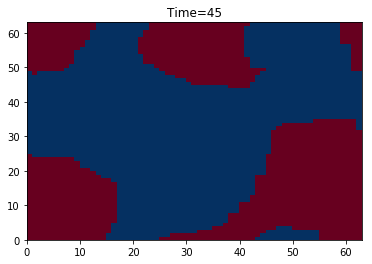

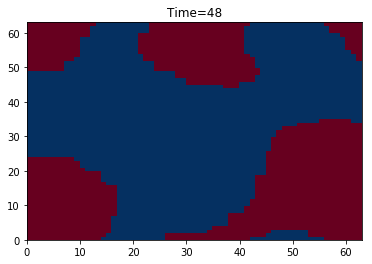

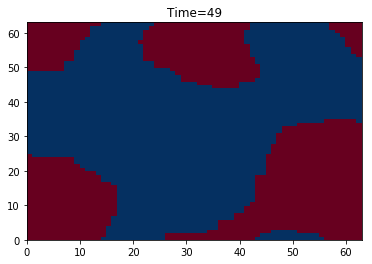

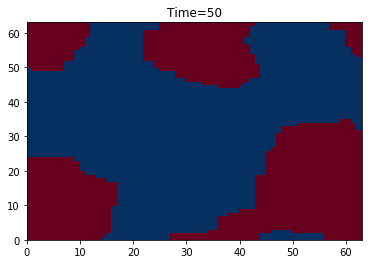

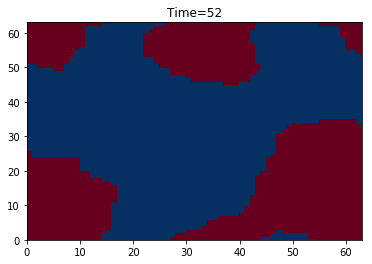

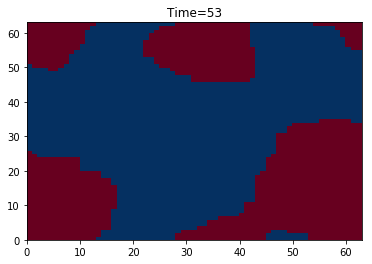

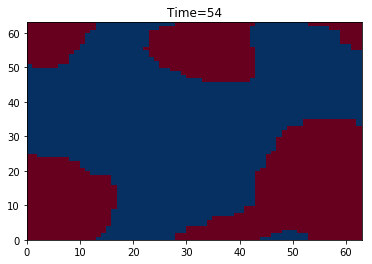

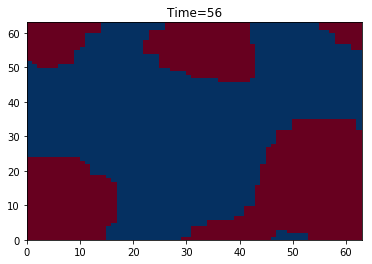

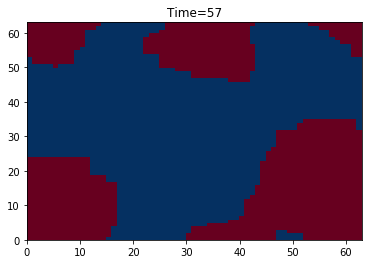

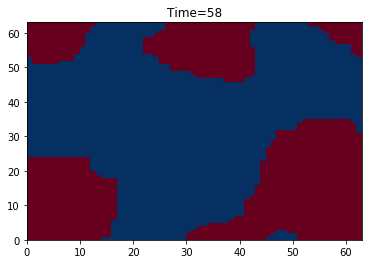

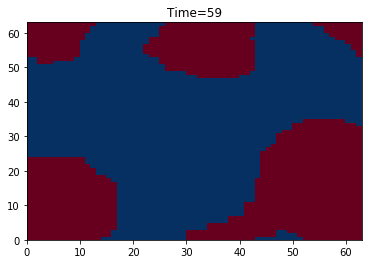

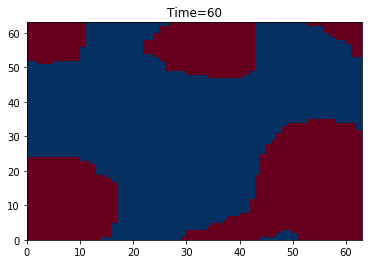

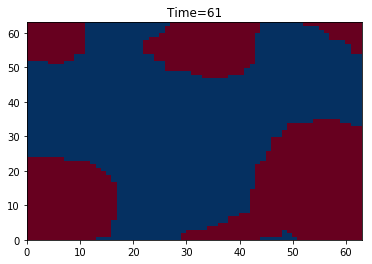

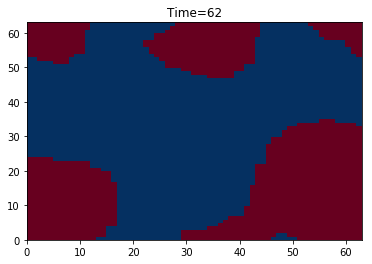

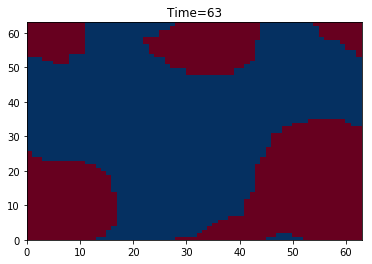

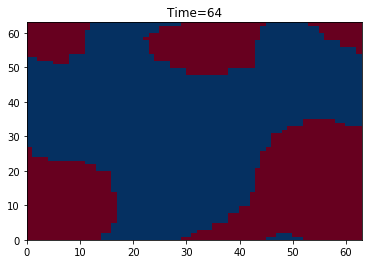

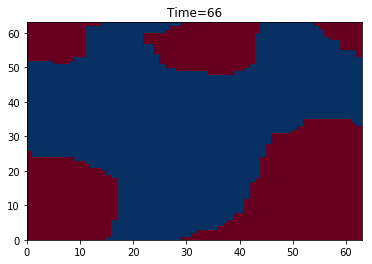

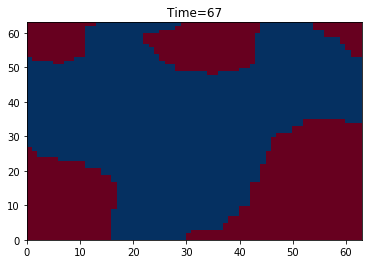

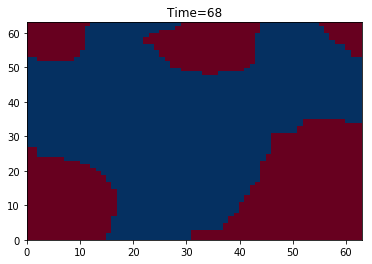

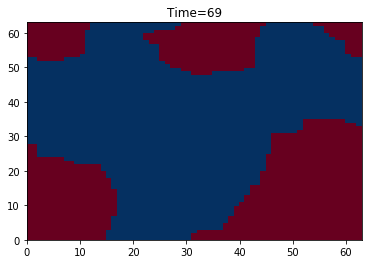

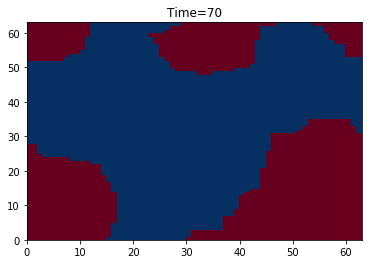

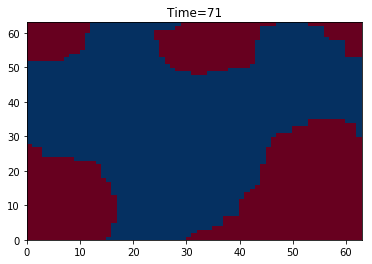

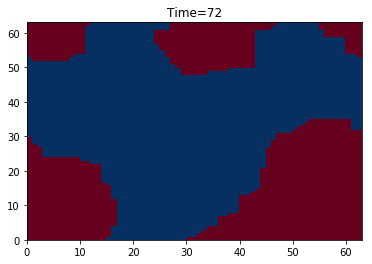

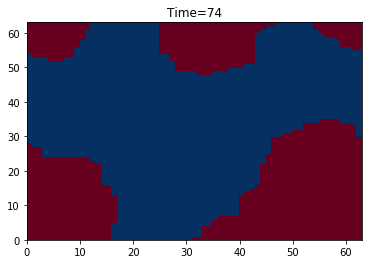

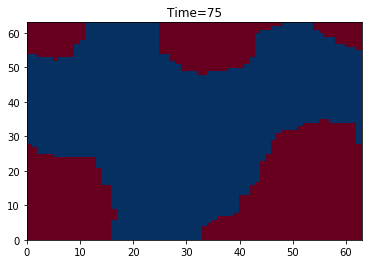

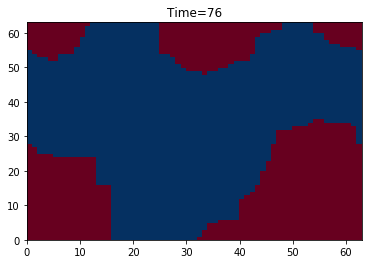

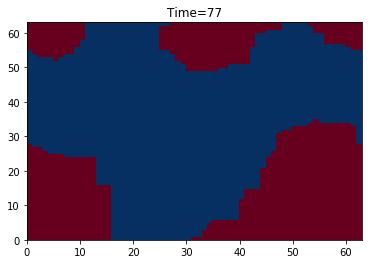

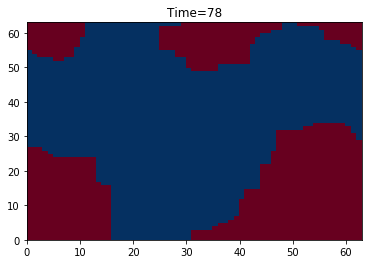

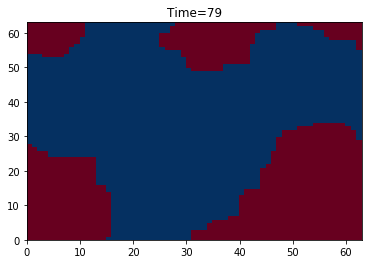

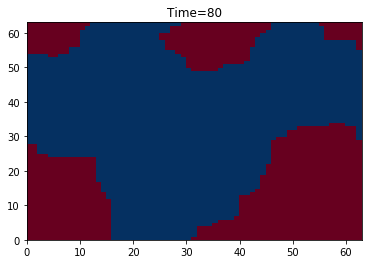

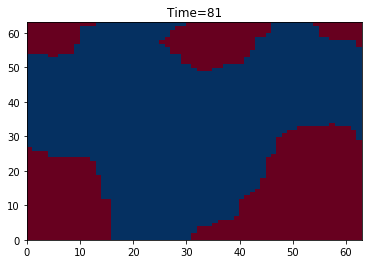

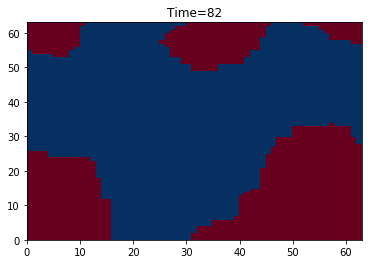

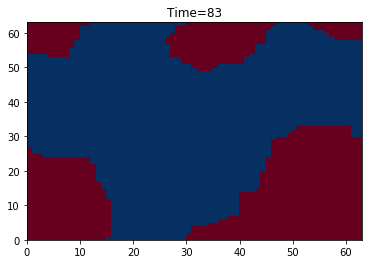

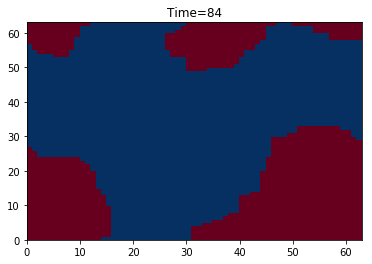

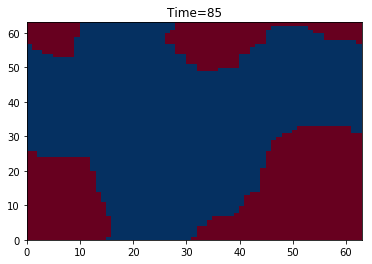

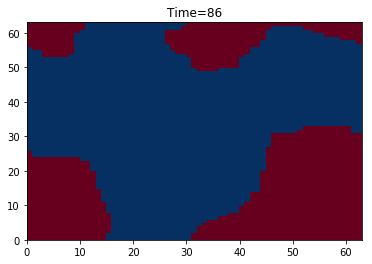

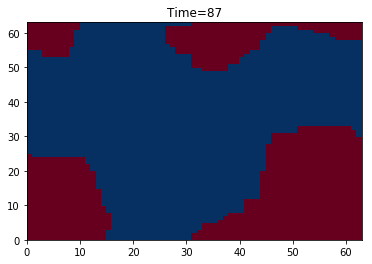

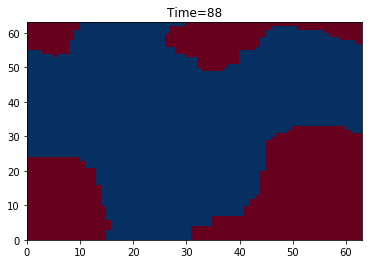

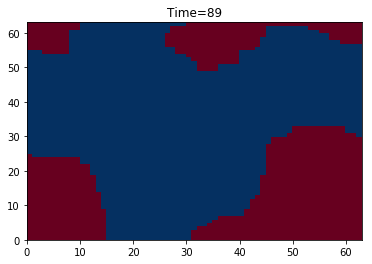

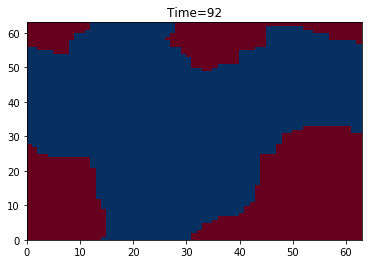

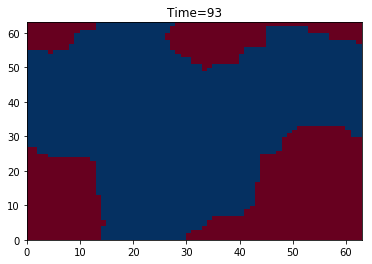

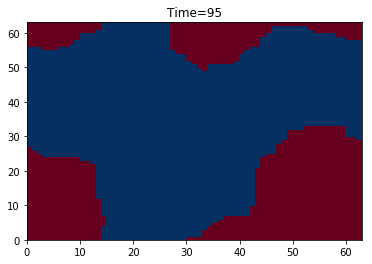

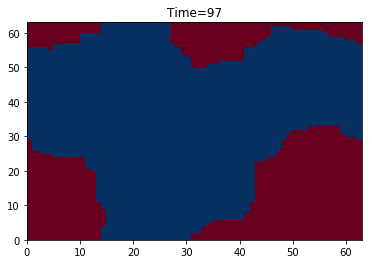

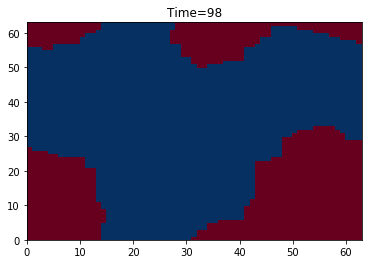

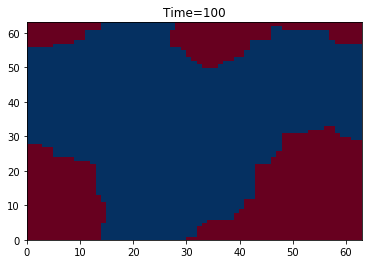

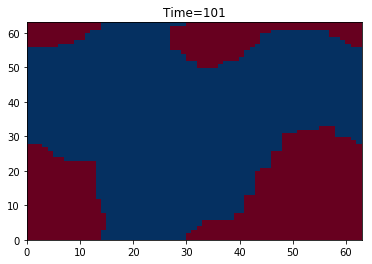

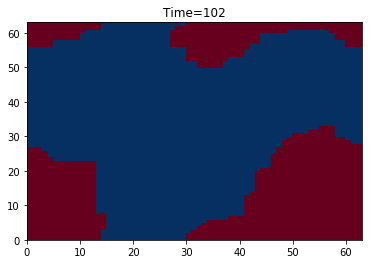

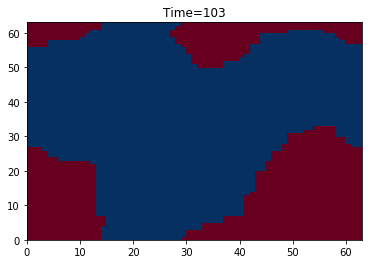

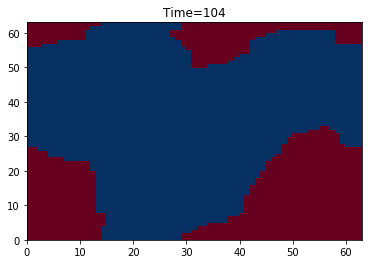

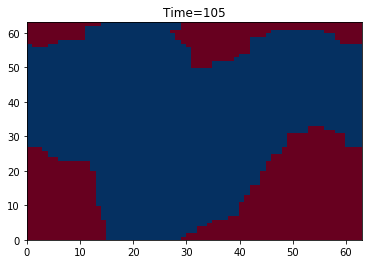

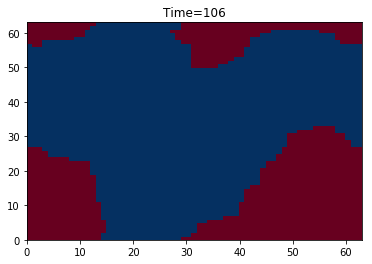

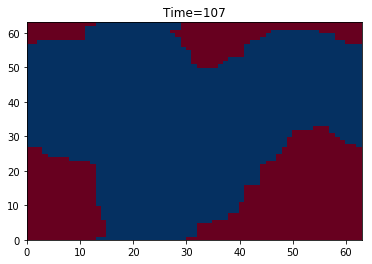

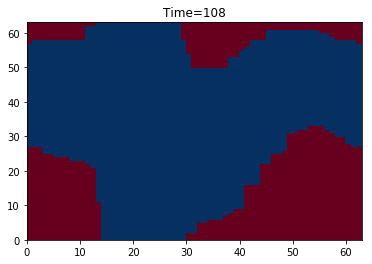

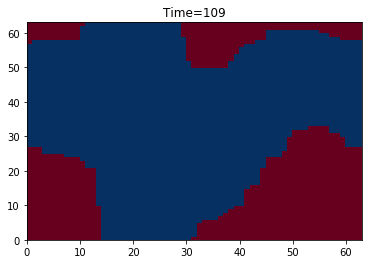

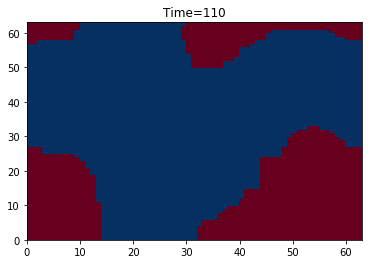

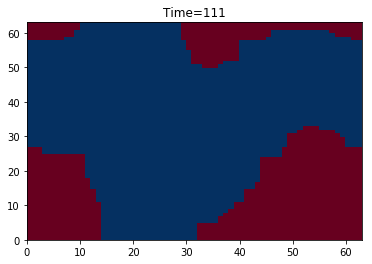

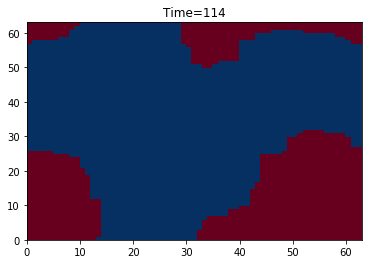

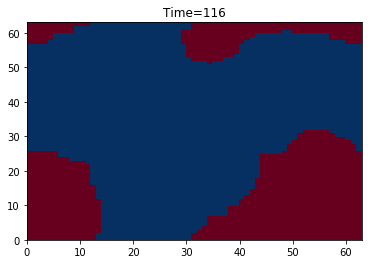

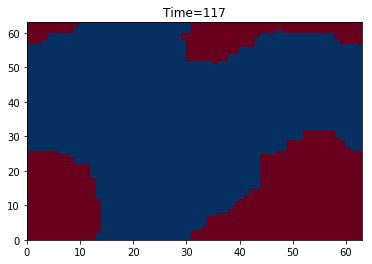

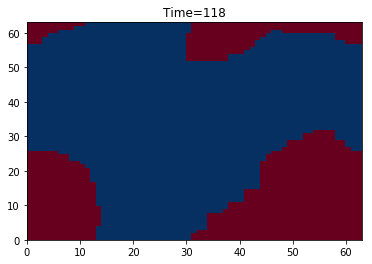

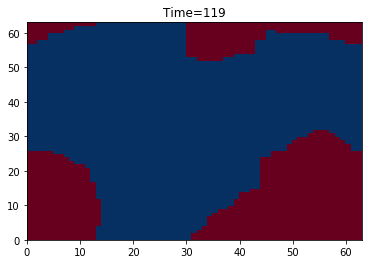

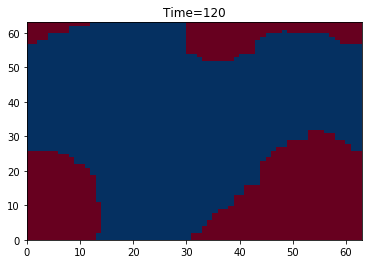

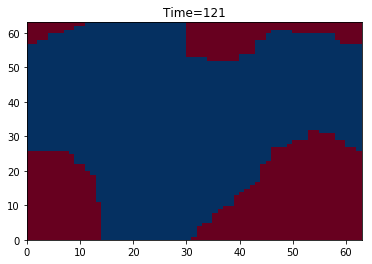

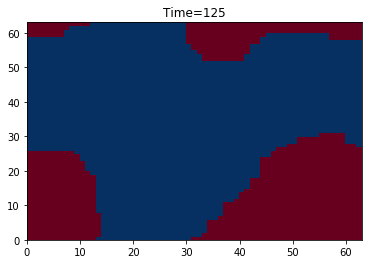

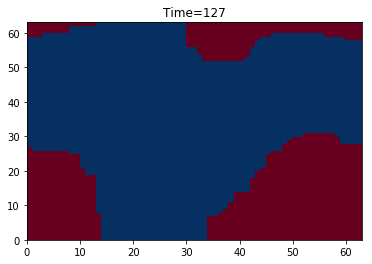

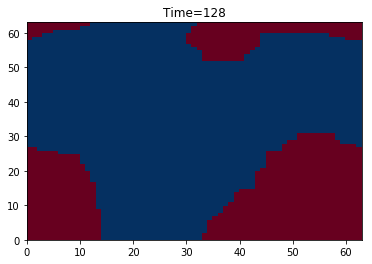

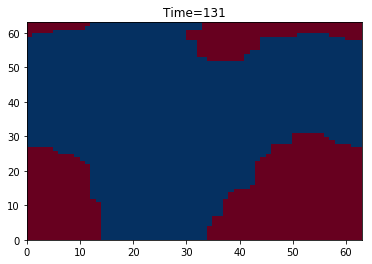

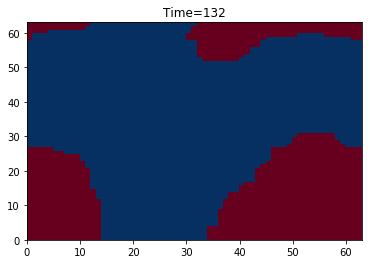

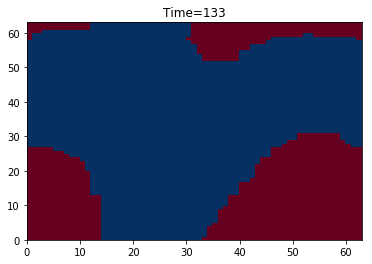

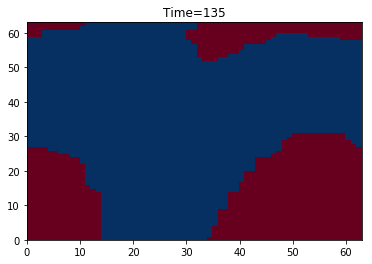

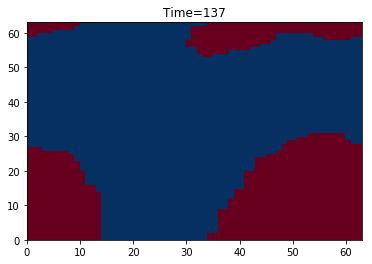

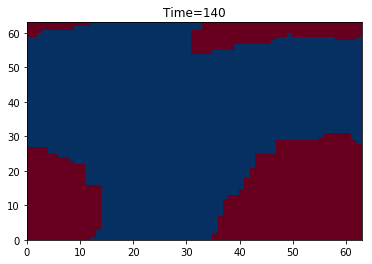

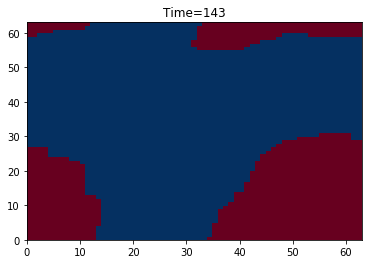

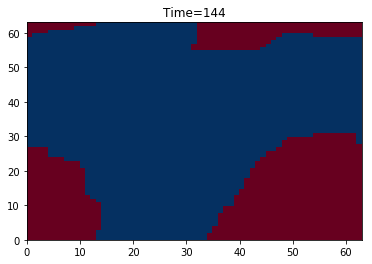

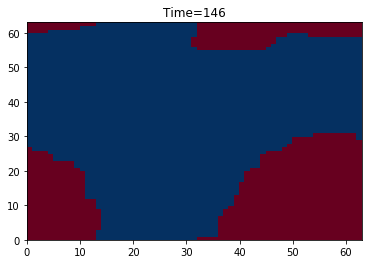

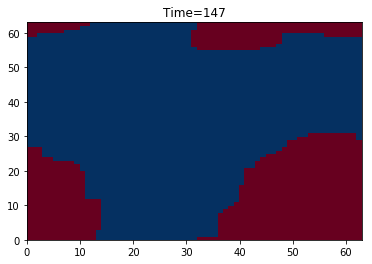

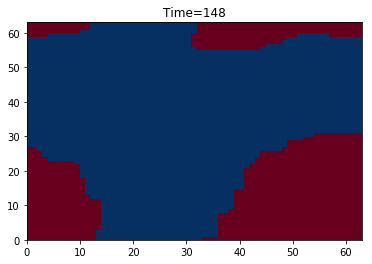

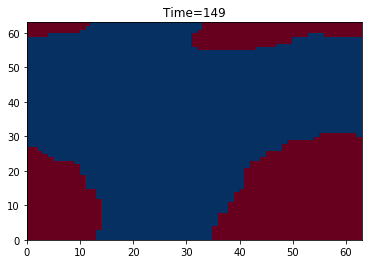

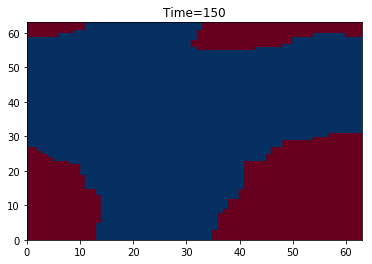

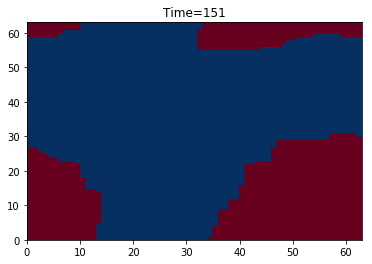

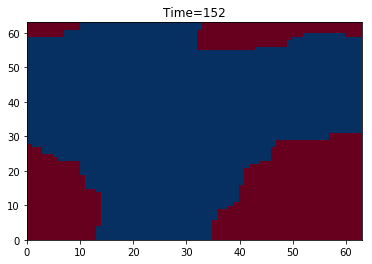

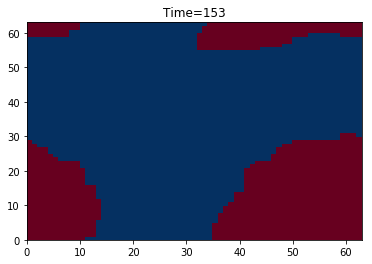

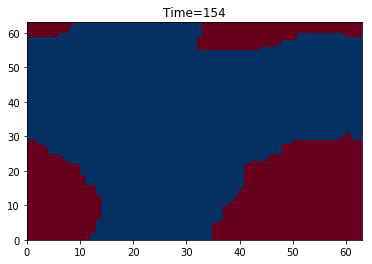

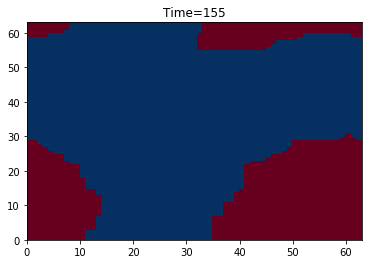

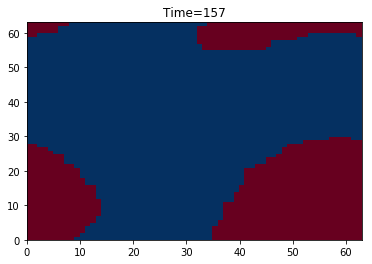

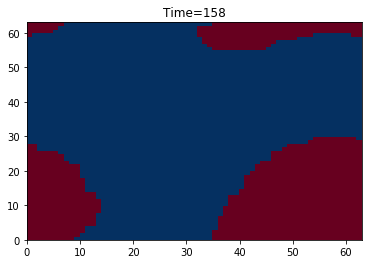

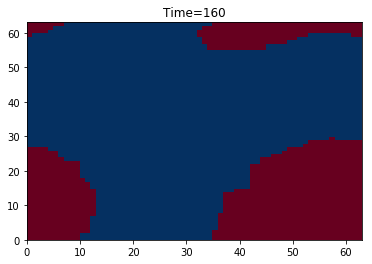

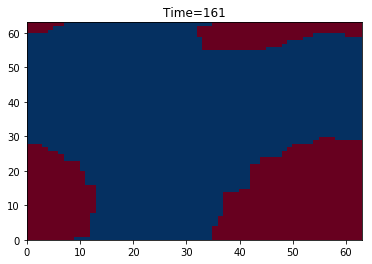

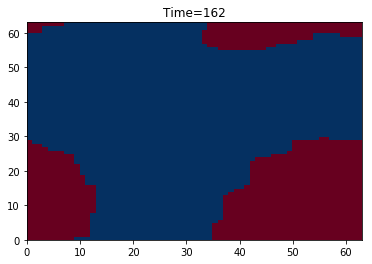

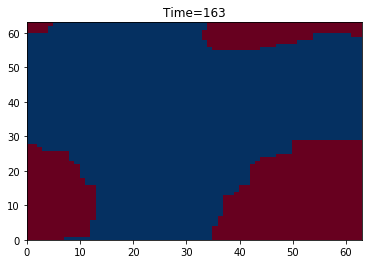

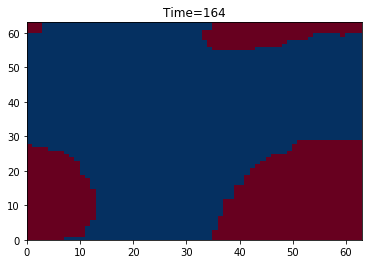

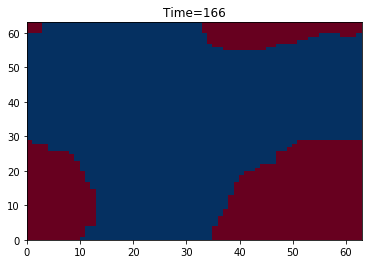

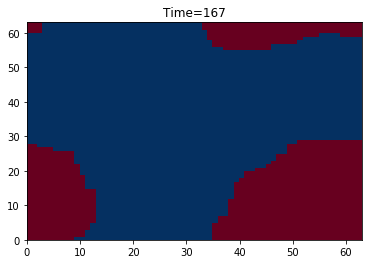

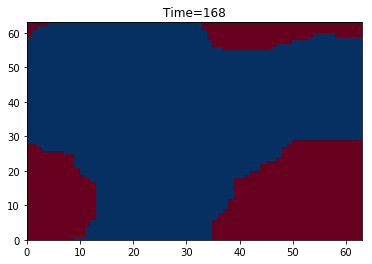

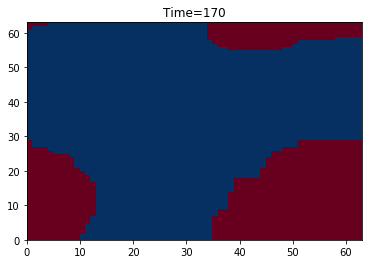

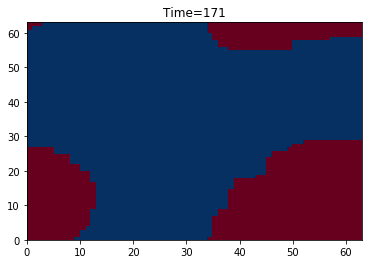

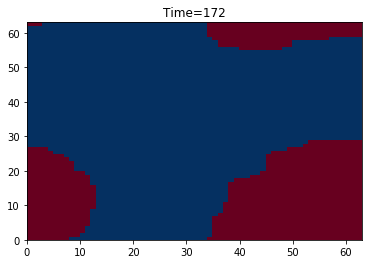

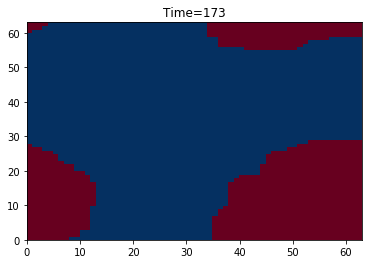

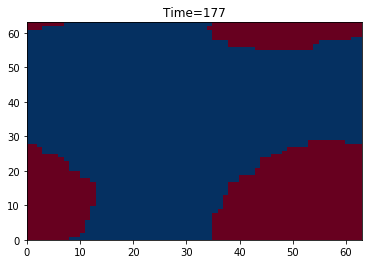

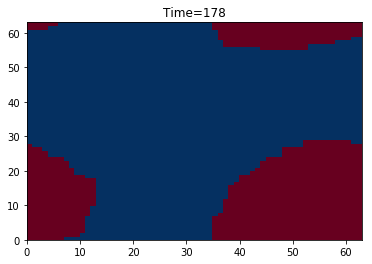

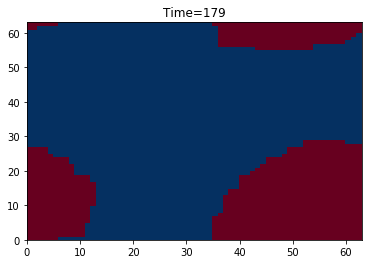

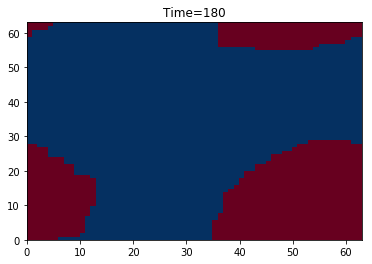

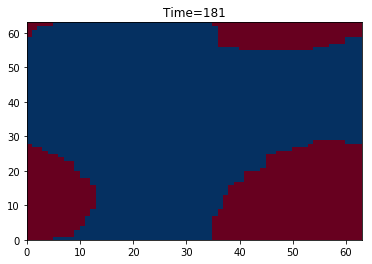

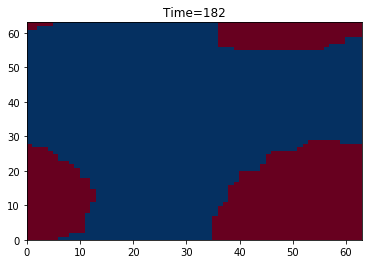

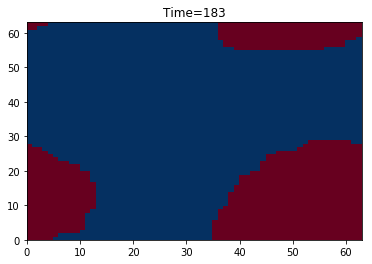

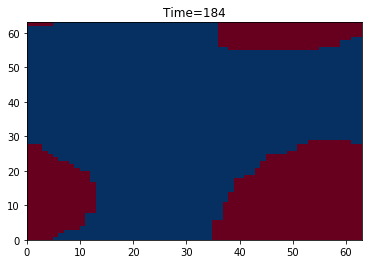

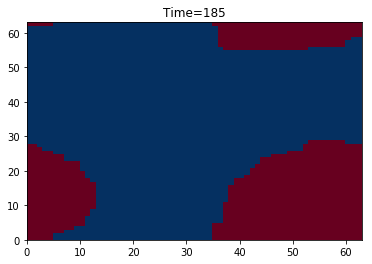

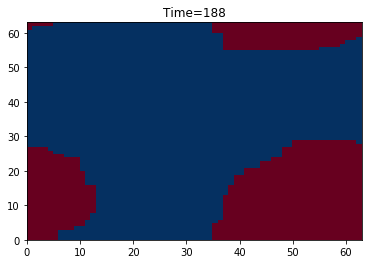

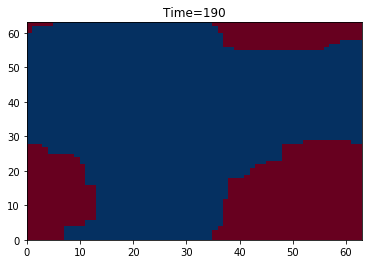

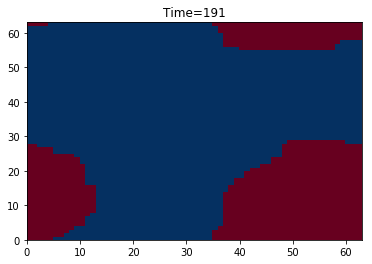

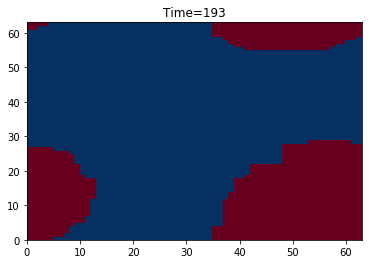

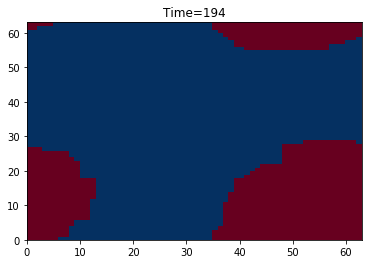

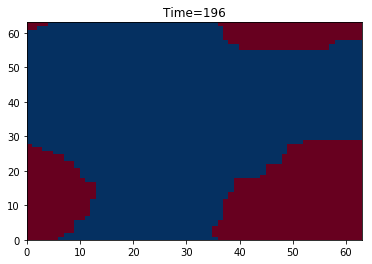

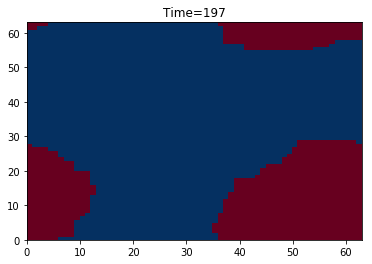

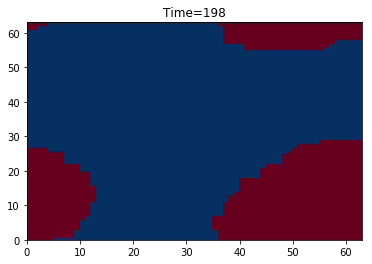

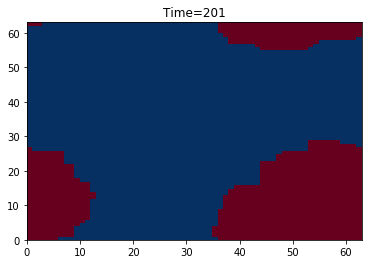

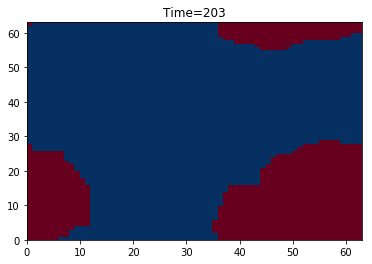

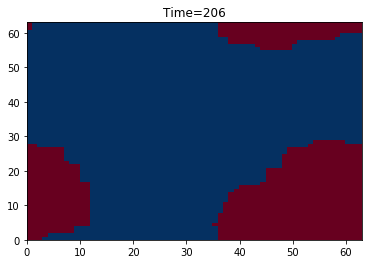

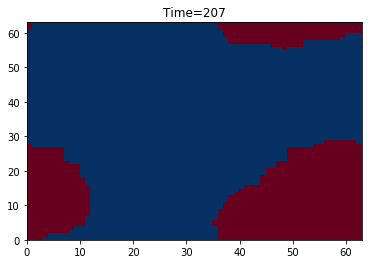

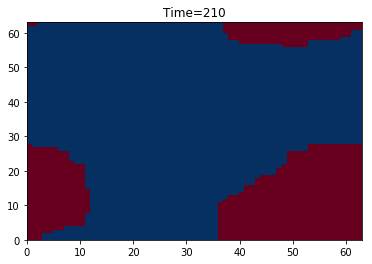

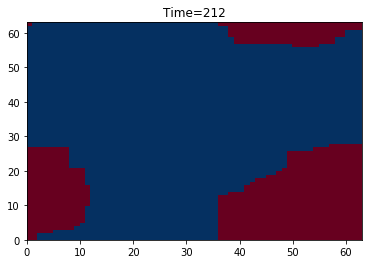

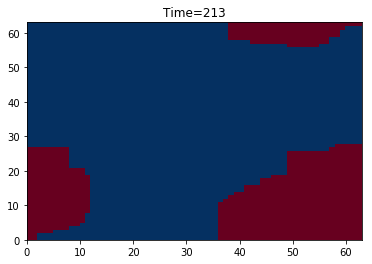

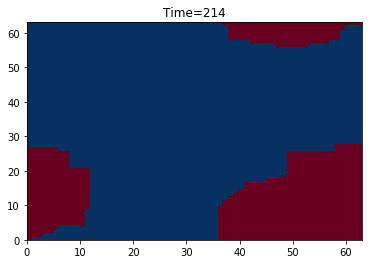

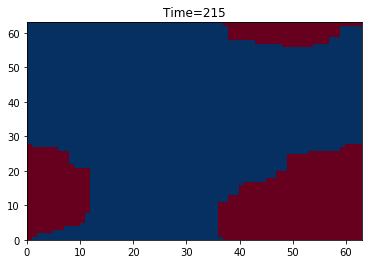

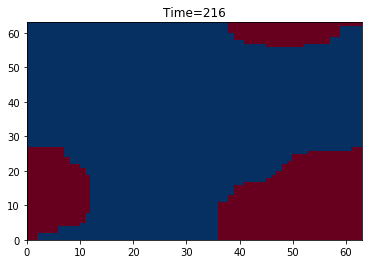

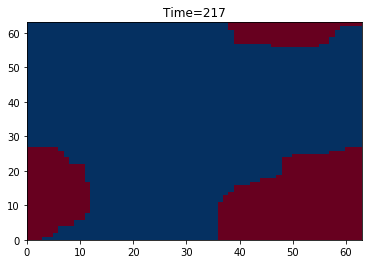

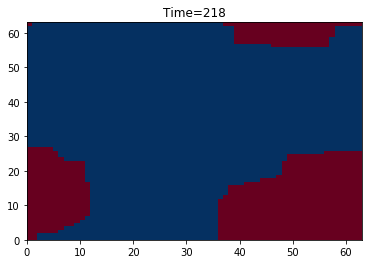

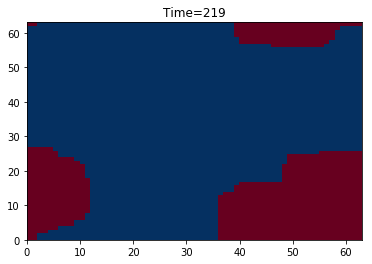

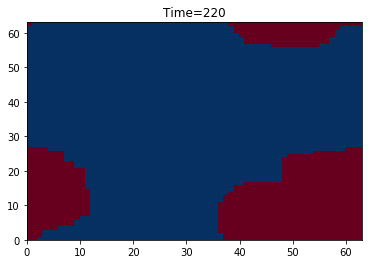

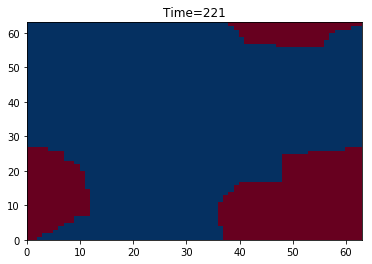

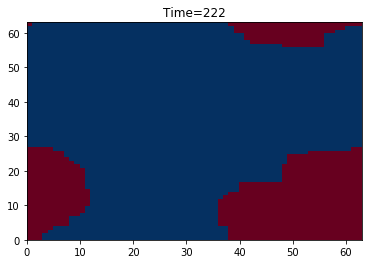

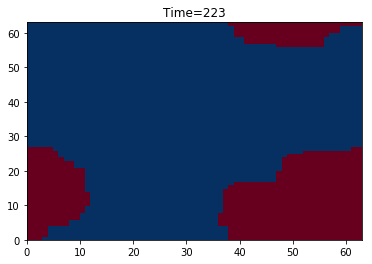

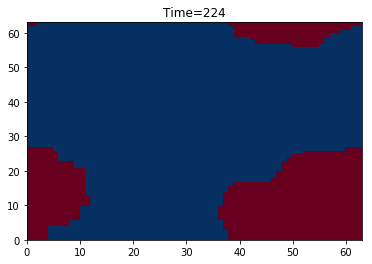

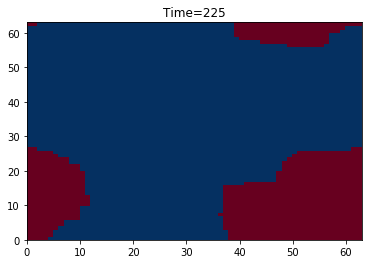

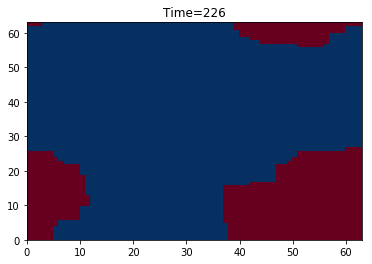

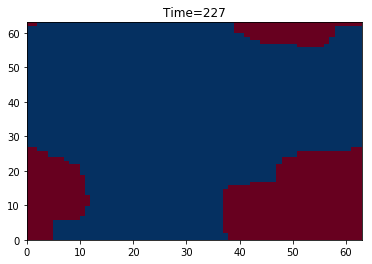

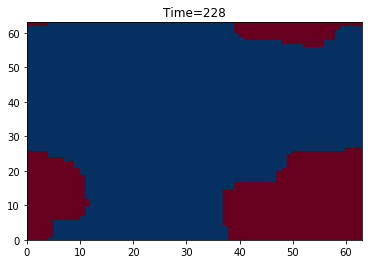

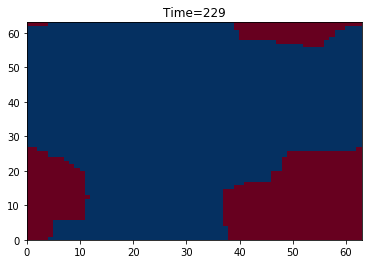

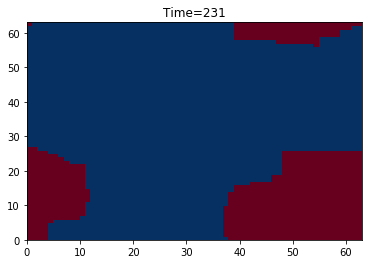

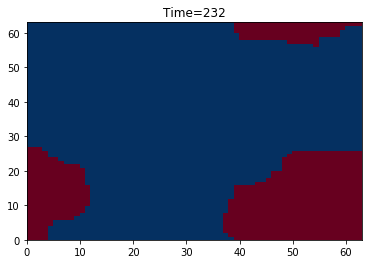

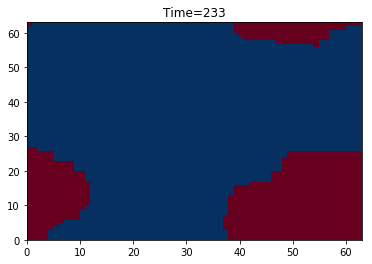

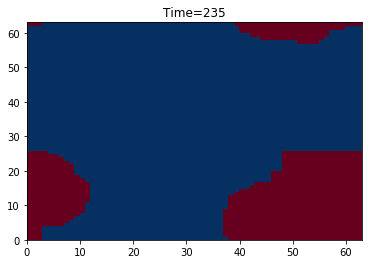

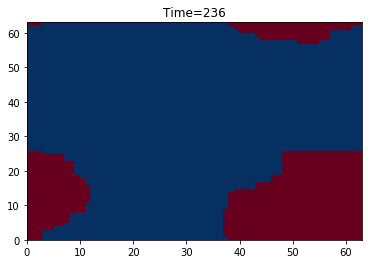

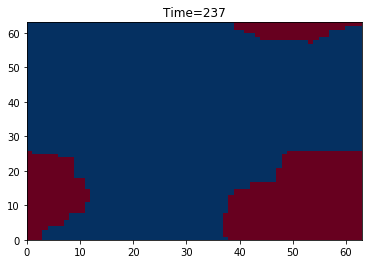

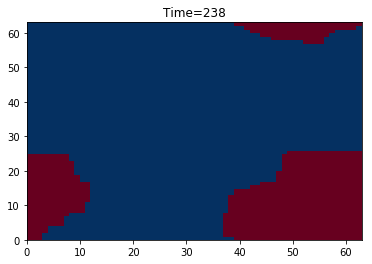

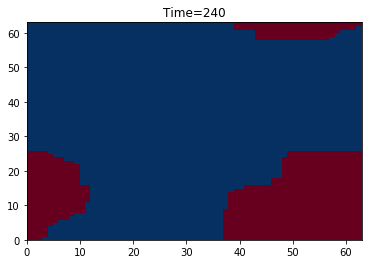

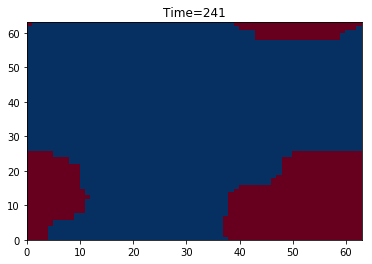

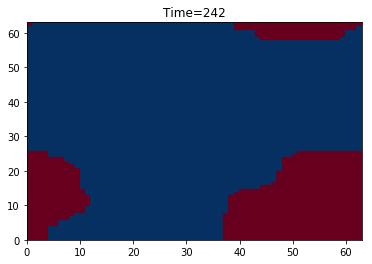

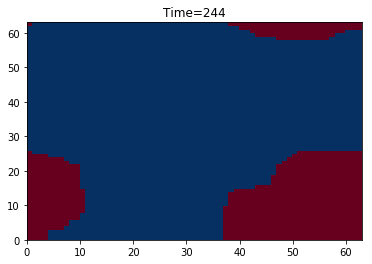

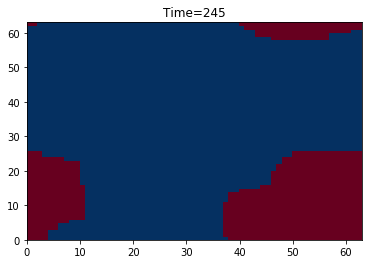

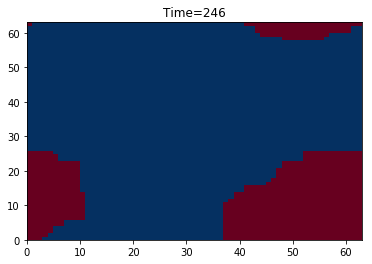

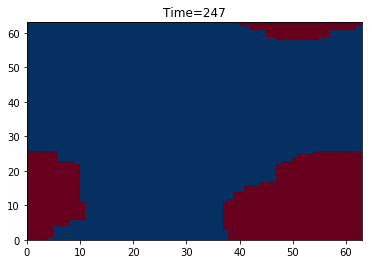

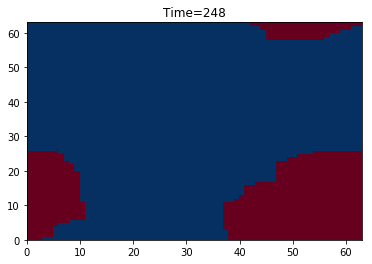

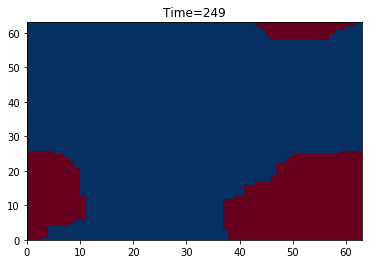

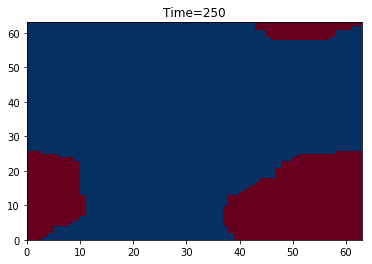

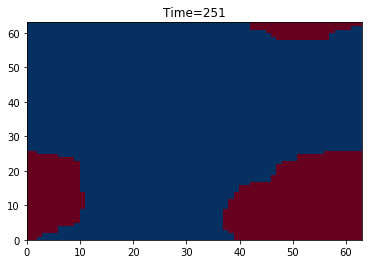

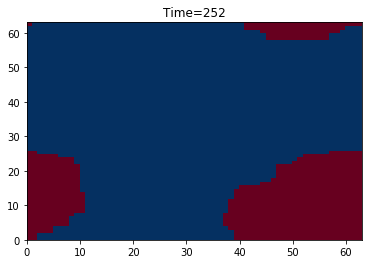

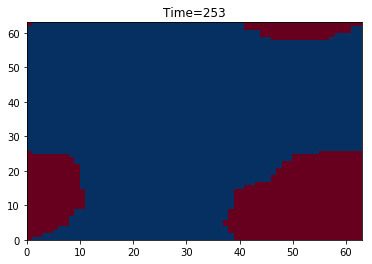

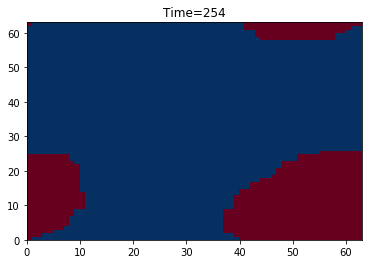

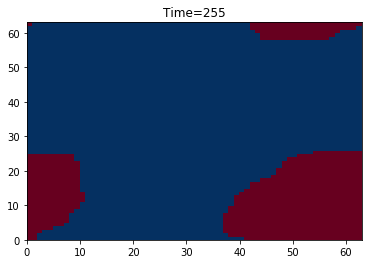

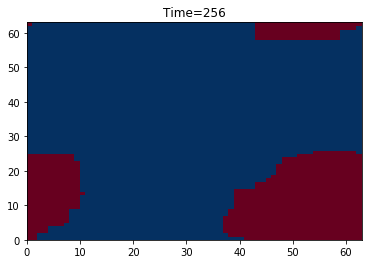

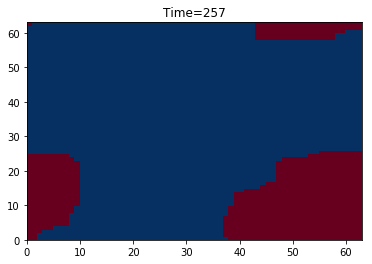

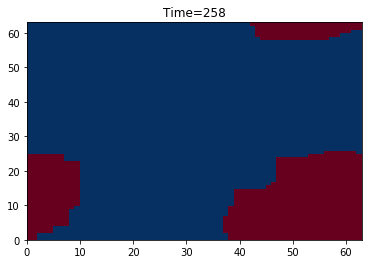

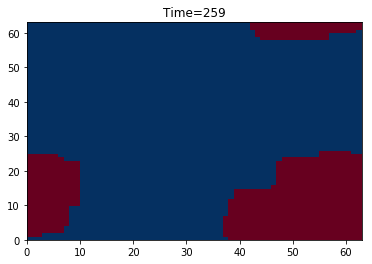

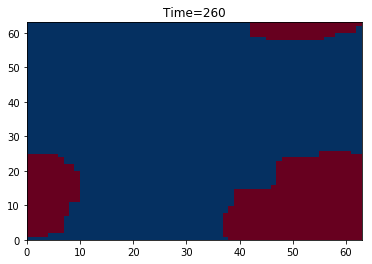

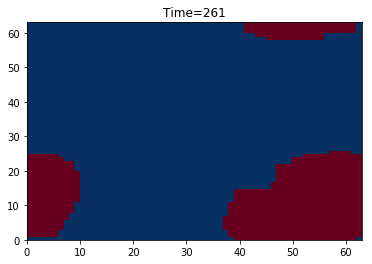

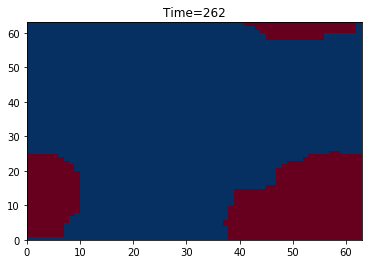

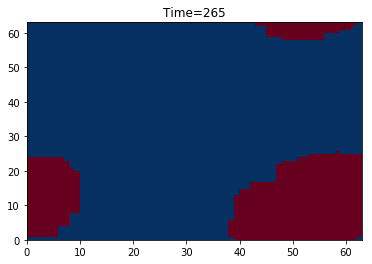

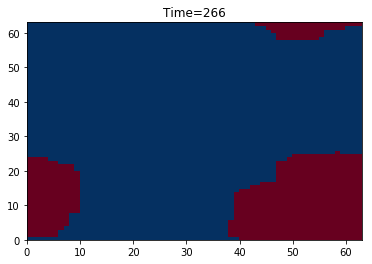

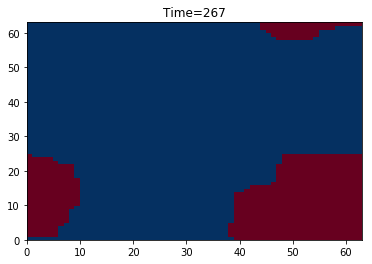

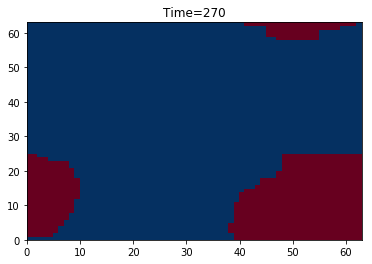

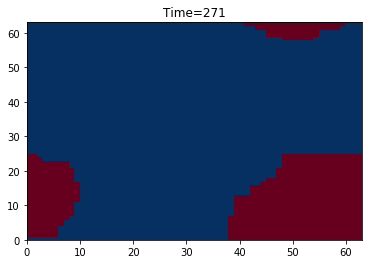

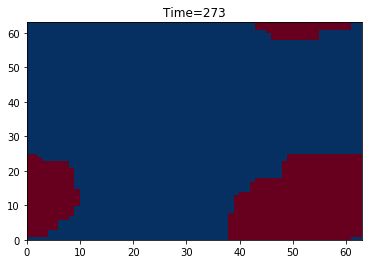

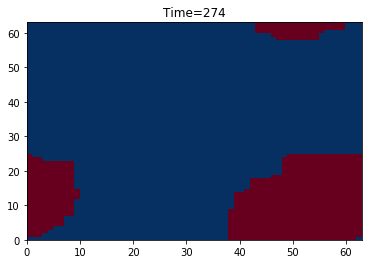

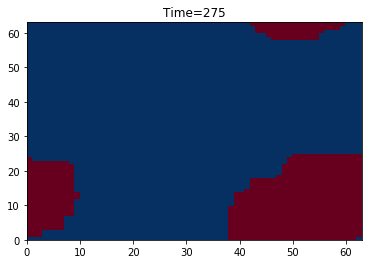

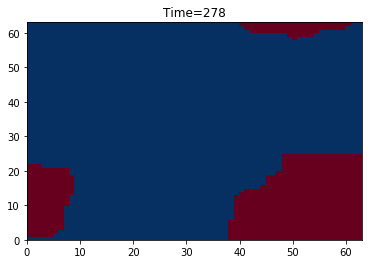

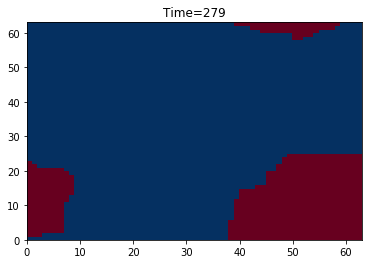

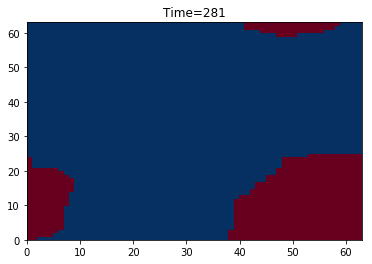

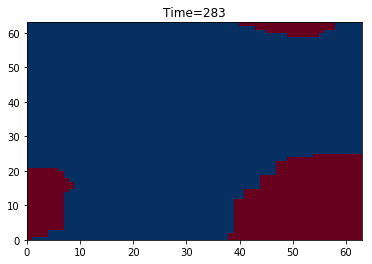

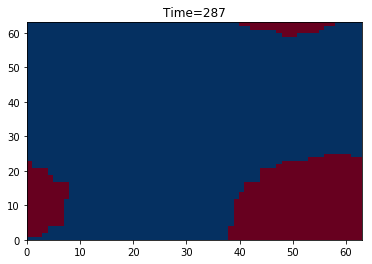

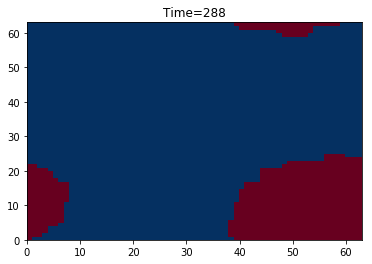

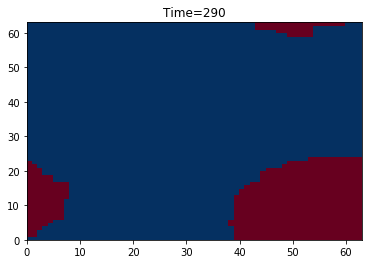

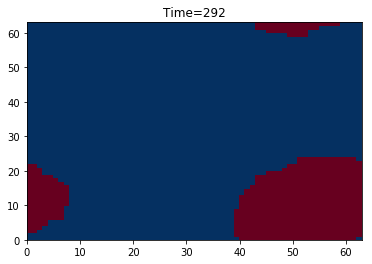

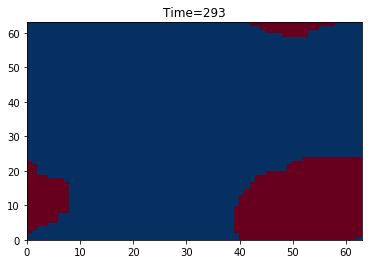

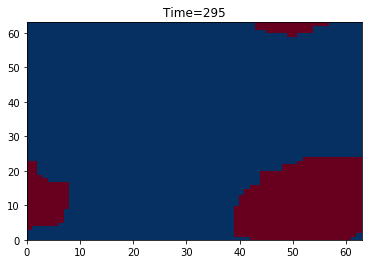

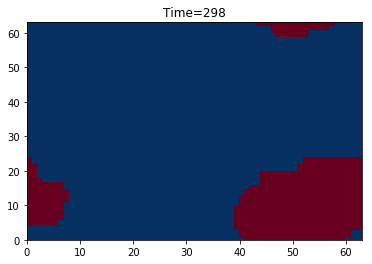

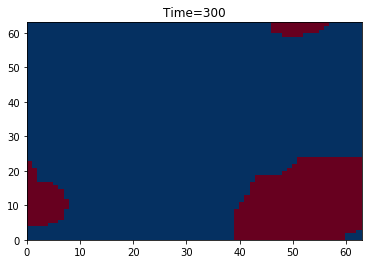

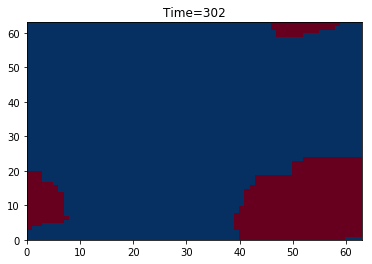

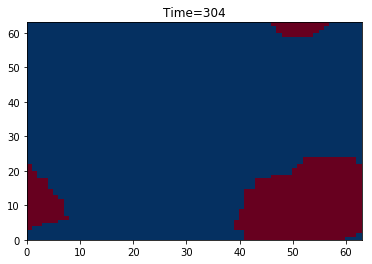

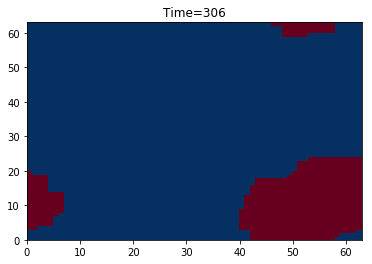

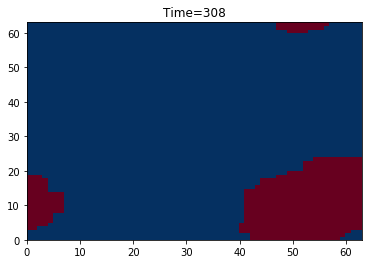

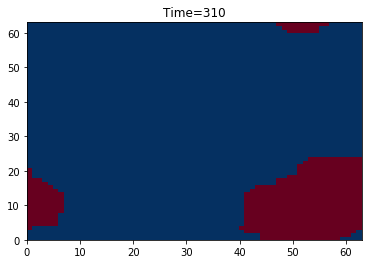

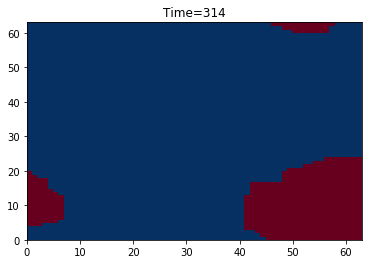

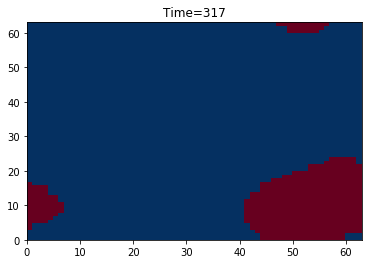

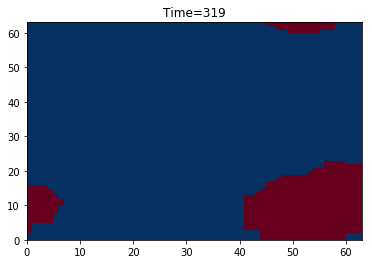

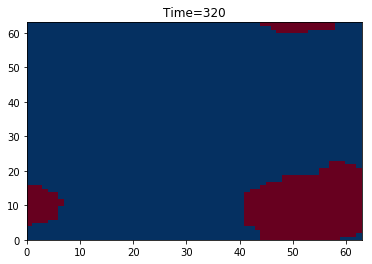

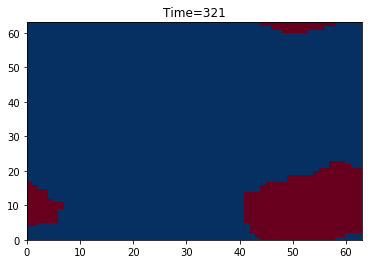

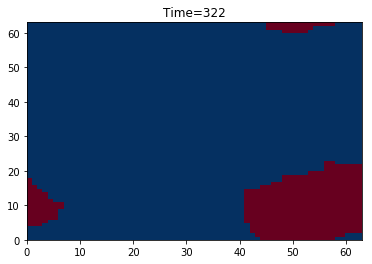

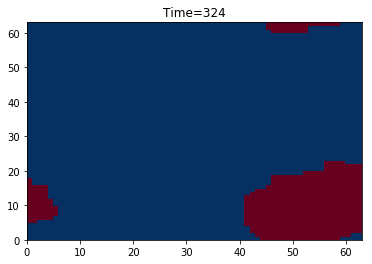

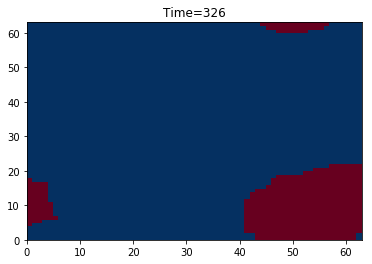

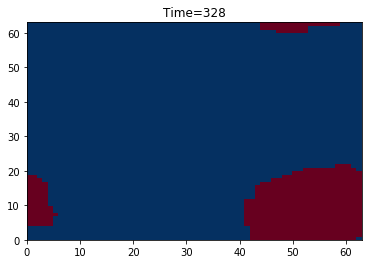

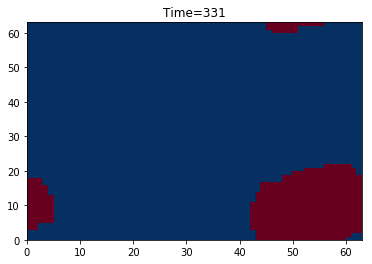

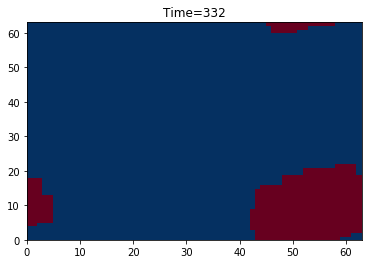

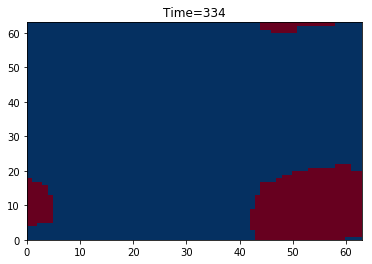

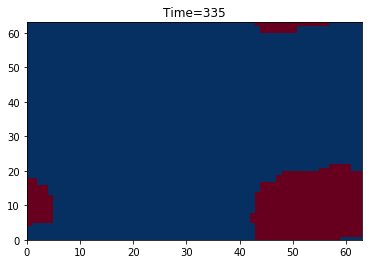

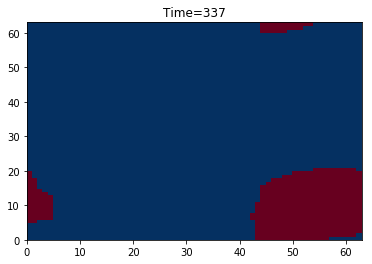

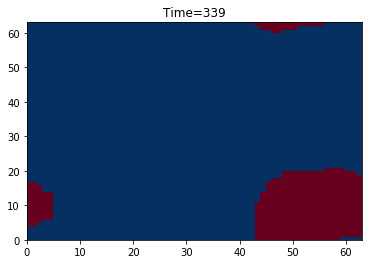

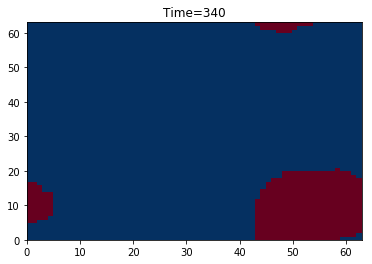

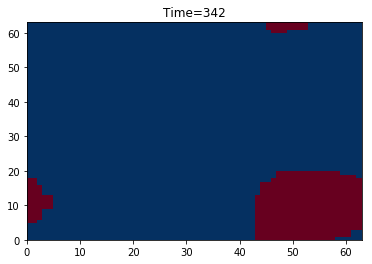

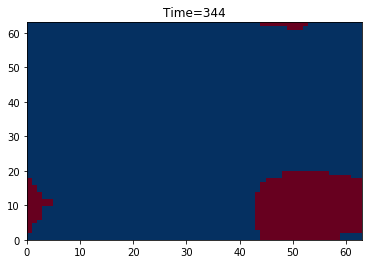

KeyboardInterrupt: 

In [7]:
rm = Ising()
rm.simulate()

RuntimeError: The animation function must return a sequence of Artist objects.

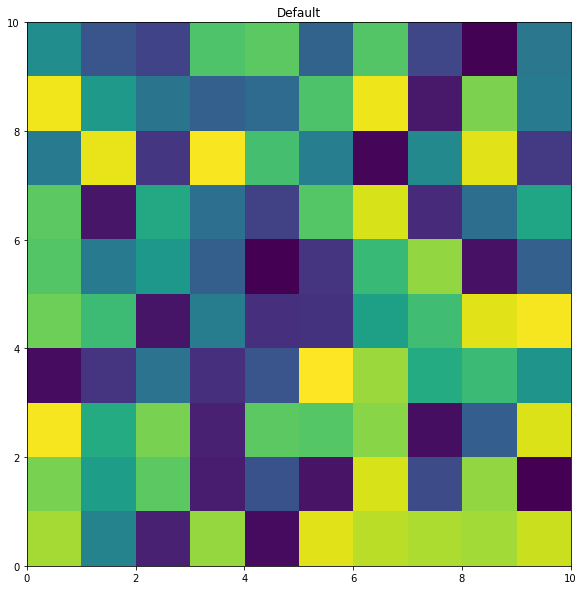

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlim(( 0, 10))
ax.set_ylim(( 0, 10))

grid = np.random.random((10,10))
ax.imshow(grid)
ax.set_title('Default')

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    #line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    grid = np.random.random((10,10))
    ax.imshow(grid, extent=[0,10,0,10])
    #line.set_data(x, y)
    #return (new_plot,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

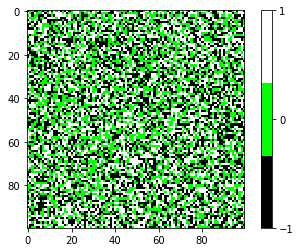

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors
#from random import randint
fig = plt.figure()

#%%
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 0, 0), (0, 1, 0), (1, 1, 1)]  # R -> G -> B
n_bins = 3  # Discretizes the interpolation into bins
cmap_name = 'ForestFire'
# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

#plt.figure(figsize = (15,15)) 

dimension = 100

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
randArr = np.random.randint(-1, 2, size = (dimension,dimension))


im = plt.imshow(randArr, cmap = cm , animated=True)
norm = matplotlib.colors.BoundaryNorm(np.arange(-1.5,2,1), cm.N)
plt.colorbar(ticks=np.linspace(-1,1,3))

def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    global randArr
    randArr = np.random.randint(-1, 2, size = (dimension,dimension))
    im.set_array(randArr)
    return im,



ani = animation.FuncAnimation(fig, updatefig, frames = 100, interval=100, blit=True)

HTML(ani.to_html5_video())
#dpi = 300
#writer = animation.writers['ffmpeg'](fps=30)
#ani.save('test.mp4',writer=writer,dpi=dpi)